<a href="https://colab.research.google.com/github/Ali-mohammadi-design/TensorFlow/blob/main/Tensorflow_House_sale_in_king_county_Prj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

Feature Columns


id - Unique ID for each home sold


date - Date of the home sale


price - Price of each home sold


bedrooms - Number of bedrooms


bathrooms - Number of bathrooms, where .5 accounts for a room with a


toilet but no shower


sqft_living - Square footage of the apartments interior living space


sqft_lot - Square footage of the land space


floors - Number of floors


waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not


view - An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment,


grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
sqft_above - The square footage of the interior housing space that is above ground level


sqft_basement - The square footage of the interior housing space that is below ground level


yr_built - The year the house was initially built


yr_renovated - The year of the house’s last renovation


zipcode - What zipcode area the house is in


lat - Lattitude


long - Longitude


sqft_living15 - The square footage of interior housing living space for
the nearest 15 neighbors


sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [2]:
df=pd.read_csv('/content/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Note: we can explore the null data with df.isull()

Note: the output of isnull is true or false. true means there is a null data.

Thus, we can use .sum to see the number of the missing data.

.sum() on the data frame would sum up all the amounts in every column.

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<ipython-input-6-80198afdd50f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

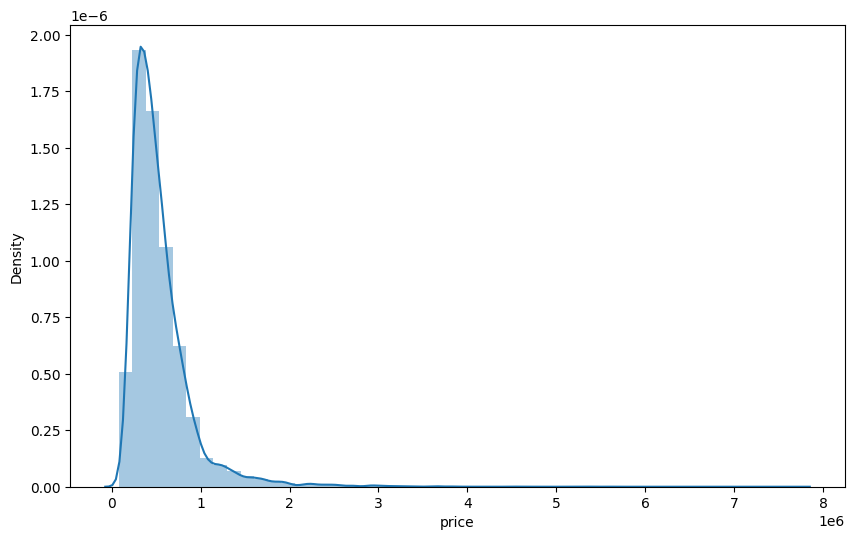

In [6]:
plt.pyplot.figure(figsize = (10,6))
sns.distplot(df['price'])

Note: As is clear on the ditribution of the price, most of the houses are priced among near to 0 to 3 milion dollars. There are afew number of houses that have been priced more than 3 milion dollars which are outliers.

We can remove the outliers to have the better training on our data.

In [7]:
df['bedrooms'].head()

0    3
1    3
2    2
3    4
4    3
Name: bedrooms, dtype: int64

<Axes: xlabel='bedrooms', ylabel='count'>

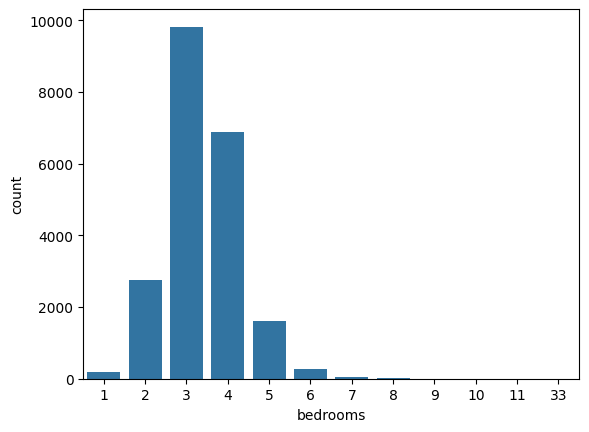

In [8]:
#sns.countplot(df['bedrooms'].head())
sns.countplot(x='bedrooms', data=df)

Note: as is clear the vast majority of the houses have between two to three bedrooms.

Note: you can also see the corrolation between the data.

Note: since the data column is str to see the corrolation we would first convert it to the data with datetime funcion in the dataframe.

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.005385,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,...,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
date,0.005385,1.000000,-0.003998,-0.016523,-0.034236,-0.034276,0.006337,-0.022333,0.001365,-0.001726,...,-0.039773,-0.027638,-0.019407,-0.000279,-0.024494,0.001605,-0.032485,-0.007228,-0.031198,0.002589
price,-0.016772,-0.003998,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,...,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,-0.016523,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,...,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,-0.034236,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,...,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,-0.034276,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,...,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.006337,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,...,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,-0.022333,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,...,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.001365,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,...,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,-0.001726,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,...,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904


In [11]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
date            -0.003998
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

Note: it is recommended that the higly corrolated features with the target would be visualised.

<Axes: xlabel='price', ylabel='sqft_living'>

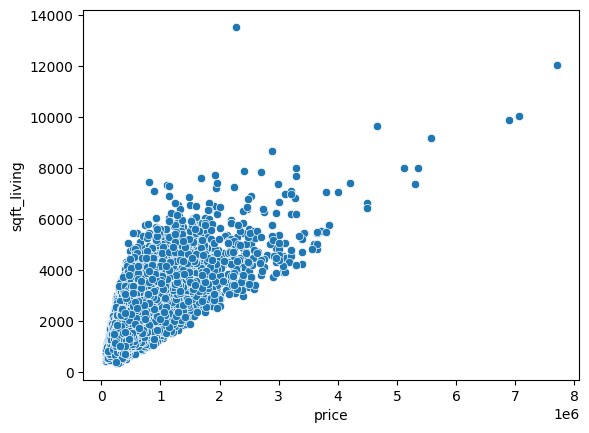

In [12]:
sns.scatterplot(x='price', y='sqft_living', data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

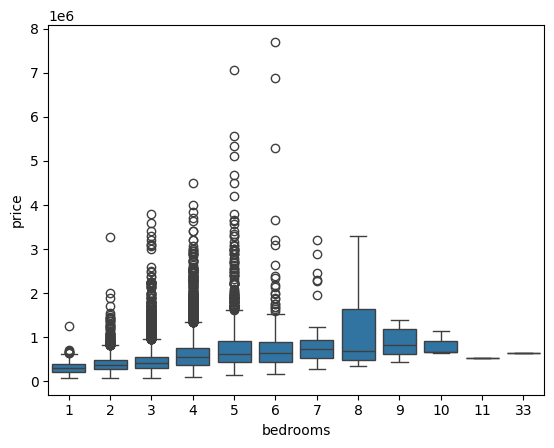

In [13]:
sns.boxplot(x='bedrooms', y='price', data=df)

Note: we can drop the top 1 percent of the most expensive houses, which are the outliers.

In [14]:
len(df)

21597

In [15]:
len(df)*0.01

215.97

In [16]:
df.sort_values('price', ascending=False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,2014-06-11,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,2014-09-19,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


In [17]:
non_top_1_percent=df.sort_values('price', ascending=False).iloc[216:]

In [18]:
non_top_1_percent.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,2014-06-02,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,2014-10-15,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2015-02-13,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,2015-04-22,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,2015-04-21,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868


Note: We can drop the ID column. Because it does not related to the target.

In [19]:
df=df.drop('id',axis=1)

In [20]:
df['date'][1].year

2014

note: We can also separate the years and months in different columns.

In [21]:
def year_extraction(date):
  return date.year

In [22]:
def month_extraction(date):
  return date.month

In [23]:
month_extraction(df['date'][1])

12

In [24]:
df['year']=df['date'].apply(year_extraction)
df['month']=df['date'].apply(month_extraction)

In [25]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


IS there month and price related?

In [26]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

<Axes: xlabel='month'>

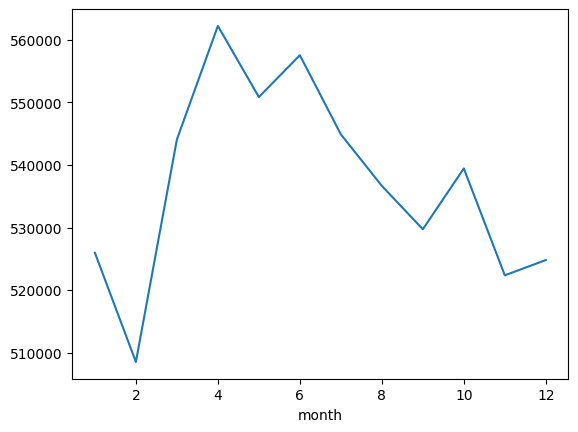

In [27]:
df.groupby('month').mean()['price'].plot()

As is clear there is not a huge relation but there is some relation. Thus we can keep the months.

What about the years?

<Axes: xlabel='year'>

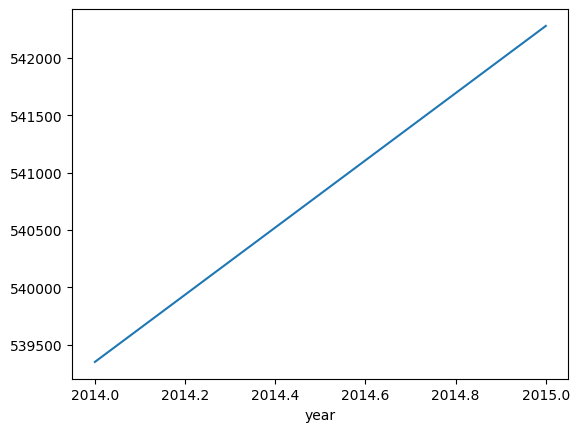

In [28]:
df.groupby('year').mean()['price'].plot()

As is clear there is a strong relationship among year and the price.

Note: now we have the relations of the year and month we can drop the date column.

In [29]:
df=df.drop('date',axis=1)

In [30]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [31]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

Note: We also have zipcodes here. The thing is that there is not a strong relationship among the Zipcodes and prices. Thus we also remove the zipcode column.

In [32]:
df=df.drop('zipcode', axis=1)

In [33]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [34]:
df['sqft_basement'].value_counts()

sqft_basement
0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

Note: After feature engineering we can train the model based on the data.

Note: we need the array and not data frame beacaus sklearn would train the model based on the arrays.

In [35]:
X=df.drop('price',axis=1).values
y=df['price'].values

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
#help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Note: Now we have to normalize the data.

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler=MinMaxScaler()

Note: we can fit and transform with just one step and with the following code.

Note: Since se do not test set impact on the model we do not fit with the test set and we just transform.

In [40]:
X_train=scaler.fit_transform(X_train)

In [41]:
X_test=scaler.transform(X_test)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Note: typically we consider the number of norouns in each layer based on the number of features.

In [43]:
X_train.shape

(15117, 19)

Since the X_train has 19 features the number of norouns could be 19.

Since the problem is regression the last layer include only one noroun as the output.

Note: As was mentioned before according to the notebook for the regression problems we would use adam as the optimizer and mse as the loss.

In [ ]:
model= Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

Note: with model.fit we can train the data.

Note: we can also add validation data in the model fit function. this validation data includes the test data but the model doesnot get affected by the result of the teting the model with the validation data. It just shows us what is going after each epoch

Note: if we have large data we have to feed in the data to the model with batches of data.

The smaller the batchsize the longer trainign will be taken.But the less chance of the overfitt.

The bachsize should be the multiplication of 2 like 128, 64, etc


In [ ]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 5ms/step - loss: 430226210816.0000 - val_loss: 418843721728.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 428520177664.0000 - val_loss: 413194452992.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 406470787072.0000 - val_loss: 363491721216.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 305994235904.0000 - val_loss: 212409843712.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 149337227264.0000 - val_loss: 100834156544.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 99486769152.0000 - val_loss: 94655176704.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 96892633088.0000 - val_loss: 92841975808.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 94805090304.0000 - val_loss: 90750009344.0000
Epoch 9/400
119/119 [=

Note: we can get the history of the trained model.On the history we have the information of the model as a dictionary.

In [ ]:
#model.history.history

Note: we can convert the model history to the data frame.

In [ ]:
pd.DataFrame(model.history.history).head()

,loss,val_loss
0,4.302262e+11,4.188437e+11
1,4.285202e+11,4.131945e+11
2,4.064708e+11,3.634917e+11
3,3.059942e+11,2.124098e+11
4,1.493372e+11,1.008342e+11


note: val_loss is the loss considered by the validation data.

We can show the losses through a diagram.

In [ ]:
loss=pd.DataFrame(model.history.history)

<Axes: >

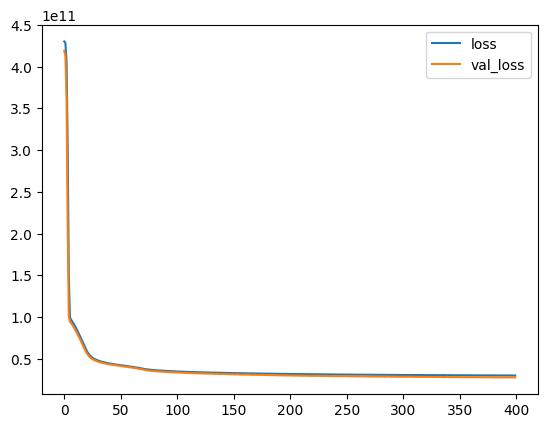

In [ ]:
loss.plot()

As is clear the behavior of both losses are similar. In this case we can continue the training up to the point that validation loss get increased in this case we have some kind of overfitting.

In [ ]:
model2= Sequential()

model2.add(Dense(19, activation='relu'))
model2.add(Dense(19, activation='relu'))
model2.add(Dense(19, activation='relu'))
model2.add(Dense(19, activation='relu'))
model2.add(Dense(19, activation='relu'))
model2.add(Dense(19, activation='relu'))
model2.add(Dense(19, activation='relu'))
model2.add(Dense(19, activation='relu'))
model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mse')

In [ ]:
model2.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=3000)

Streaming output truncated to the last 5000 lines.
119/119 [==============================] - 1s 5ms/step - loss: 17526431744.0000 - val_loss: 16893965312.0000
Epoch 502/3000
119/119 [==============================] - 1s 6ms/step - loss: 17456001024.0000 - val_loss: 17242800128.0000
Epoch 503/3000
119/119 [==============================] - 1s 6ms/step - loss: 17566746624.0000 - val_loss: 17175081984.0000
Epoch 504/3000
119/119 [==============================] - 1s 6ms/step - loss: 17386436608.0000 - val_loss: 16952724480.0000
Epoch 505/3000
119/119 [==============================] - 0s 4ms/step - loss: 17327153152.0000 - val_loss: 17044284416.0000
Epoch 506/3000
119/119 [==============================] - 0s 4ms/step - loss: 17523050496.0000 - val_loss: 17043861504.0000
Epoch 507/3000
119/119 [==============================] - 0s 4ms/step - loss: 17544648704.0000 - val_loss: 17490014208.0000
Epoch 508/3000
119/119 [==============================] - 0s 4ms/step - loss: 17486716928.0000 -

<Axes: >

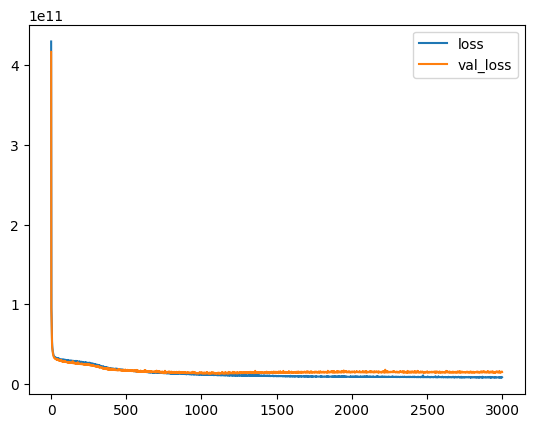

In [ ]:
loss2=pd.DataFrame(model2.history.history)
loss2.plot()

Note: As is clear in the diagram from around 1000 epochs we have overfitting so that the more epochs would fit the model on the data but would not be fitted on the test data (actual data) and the loss would be increased.

In [44]:
model3= Sequential()

model3.add(Dense(19, activation='relu'))
model3.add(Dense(19, activation='relu'))
model3.add(Dense(19, activation='relu'))
model3.add(Dense(19, activation='relu'))
model3.add(Dense(19, activation='relu'))
model3.add(Dense(19, activation='relu'))
model3.add(Dense(19, activation='relu'))
model3.add(Dense(19, activation='relu'))
model3.add(Dense(1))

model3.compile(optimizer='adam', loss='mse')

In [46]:
model3.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=1000)

Epoch 1/1000
119/119 [==============================] - 5s 8ms/step - loss: 430023278592.0000 - val_loss: 416184401920.0000
Epoch 2/1000
119/119 [==============================] - 0s 4ms/step - loss: 246535208960.0000 - val_loss: 93104676864.0000
Epoch 3/1000
119/119 [==============================] - 1s 4ms/step - loss: 92458131456.0000 - val_loss: 85264793600.0000
Epoch 4/1000
119/119 [==============================] - 0s 4ms/step - loss: 83669729280.0000 - val_loss: 76154077184.0000
Epoch 5/1000
119/119 [==============================] - 0s 4ms/step - loss: 73448366080.0000 - val_loss: 66074181632.0000
Epoch 6/1000
119/119 [==============================] - 0s 4ms/step - loss: 62599114752.0000 - val_loss: 56058073088.0000
Epoch 7/1000
119/119 [==============================] - 0s 3ms/step - loss: 54457552896.0000 - val_loss: 50495082496.0000
Epoch 8/1000
119/119 [==============================] - 0s 3ms/step - loss: 49981046784.0000 - val_loss: 46844334080.0000
Epoch 9/1000
119/119 

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [48]:
predictions=model3.predict(X_test)

203/203 [==============================] - 1s 2ms/step


In [49]:
mean_squared_error(y_test, predictions)

20295489484.411037

In [50]:
mean_absolute_error(y_test, predictions)

85529.59402488425

In [51]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [52]:
5.402966e+05

540296.6

As is clear, the mean price is near haf milion dollars while the mean absoulute error is about 80 k. It could be unacceptable!

We can also see the variance.

In [53]:
explained_variance_score(y_test, predictions)

0.8567042460891059

We can plot the prediction with the actual targets

Note: Whatever the dots are more near to the line of the y to y the model is more precised.

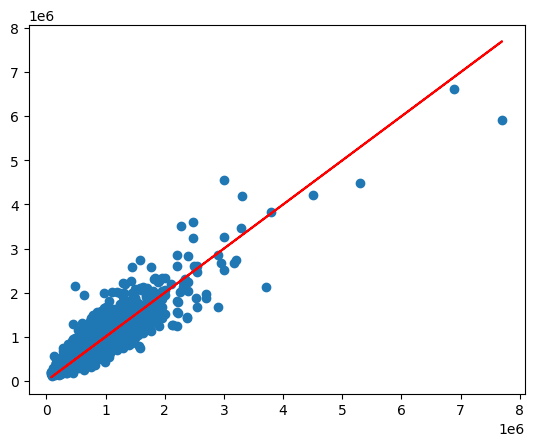

In [58]:
plt.pyplot.scatter(y_test, predictions)
plt.pyplot.plot(y_test, y_test, 'r')

As is clear, the model is good for predicting the prices of houses between 0 to 2 milion dollars. But is not good for the more expensive houses.

Thus, we can just retrain the model on the houses among 0 to 3 milion dollars and specify that this model is fine just for these kind of houses.

In [59]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


Note: let's see how the model work for predicting a house price

In [64]:
df.drop('price', axis=1).iloc[0]

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [70]:
single_house=df.drop('price', axis=1).iloc[0]

In [73]:
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [72]:
single_house.values.shape

(19,)

In [78]:
single_house.values.reshape(1,19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [77]:
single_house.values.reshape(1,19).shape

(1, 19)

In [80]:
single_house=scaler.transform(single_house.values.reshape(1,19))

In [81]:
model3.predict(single_house)

1/1 [==============================] - 0s 39ms/step


array([[269106.8]], dtype=float32)

In [82]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
